In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [114]:
data = pd.read_csv('rainfall.csv')
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [115]:
data.shape

(366, 12)

In [116]:
print(data['day'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [117]:
print(data.columns)

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')


In [118]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')


In [119]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [120]:
data = data.drop(columns=['day'],axis = 1)

In [121]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [122]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [123]:
data['winddirection'] = data['winddirection'].fillna(data['winddirection'].mode()[0])
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].median())

In [124]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [125]:
print(data['rainfall'].unique())

['yes' 'no']


In [126]:
encoder = LabelEncoder()

In [127]:
data['rainfall'] = encoder.fit_transform(data['rainfall'])

In [128]:
print(data['rainfall'].unique())

[1 0]


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    int64  
 8   sunshine       366 non-null    float64
 9   winddirection  366 non-null    float64
 10  windspeed      366 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.6 KB


# EDA

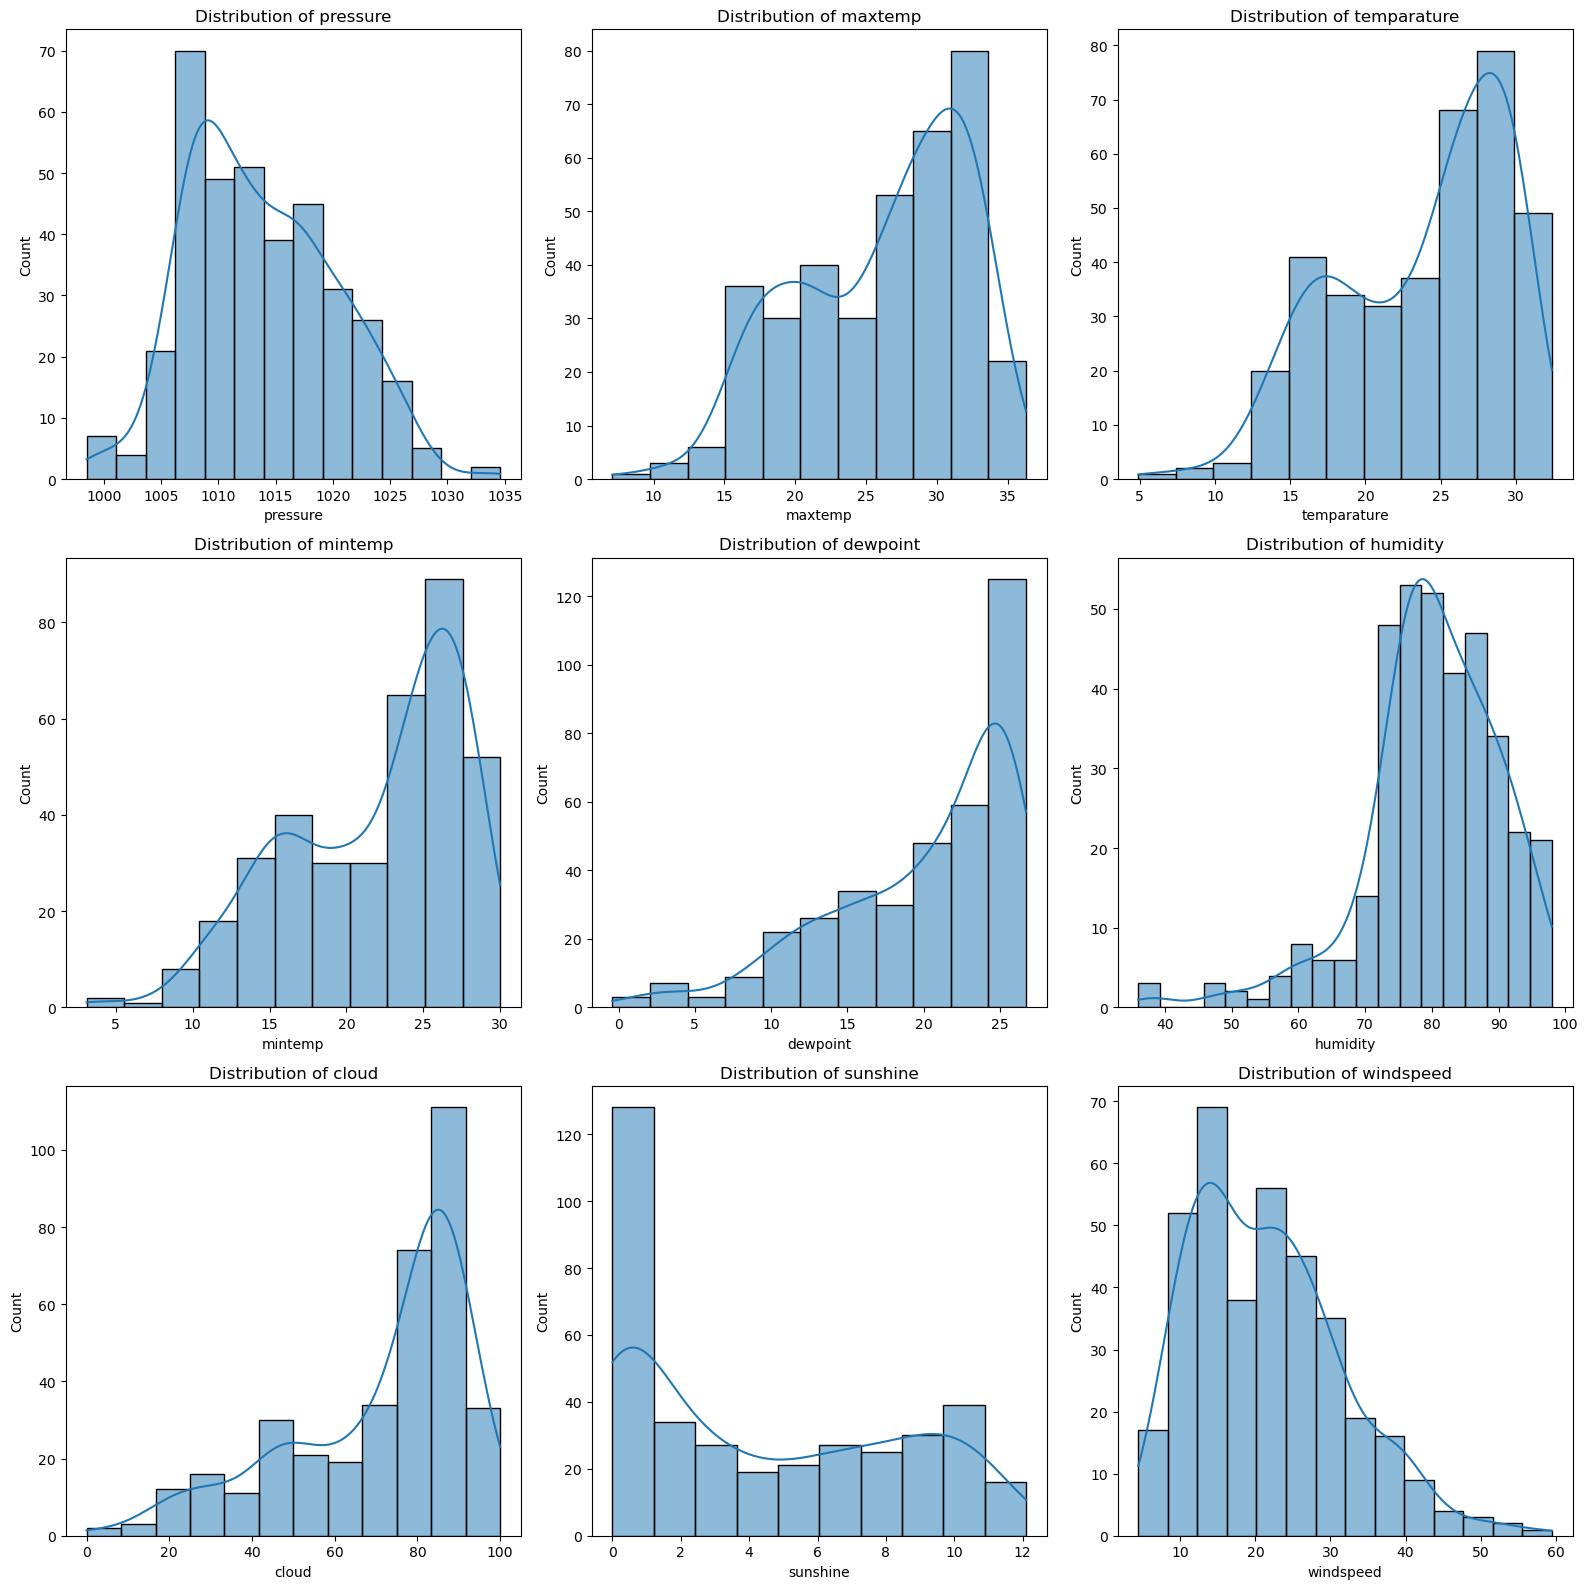

In [130]:
plt.figure(figsize=(16,16))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint','humidity', 'cloud', 'sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

<Axes: xlabel='rainfall', ylabel='count'>

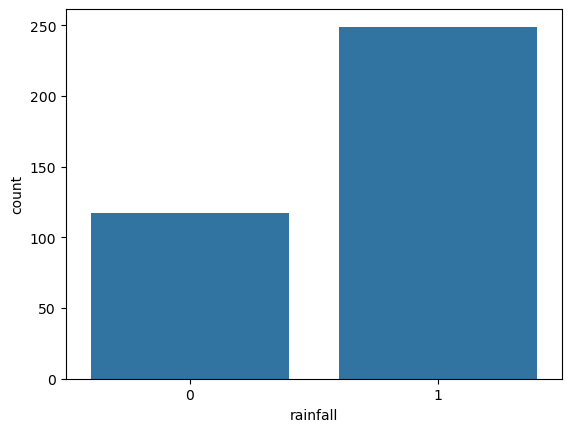

In [131]:
sns.countplot(data=data, x= 'rainfall')

In [132]:
corr = data.corr()

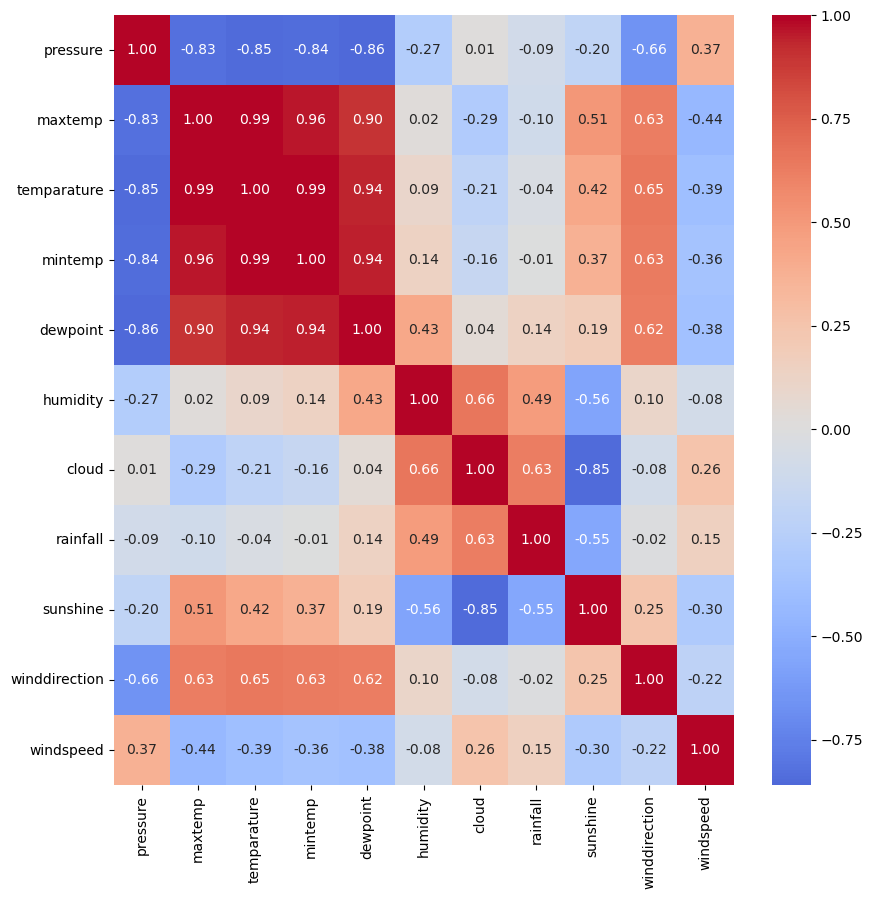

In [133]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",center=0)
plt.show()

# Data Pre-processing

In [134]:
# As maxtemp, temprature, mintemp and dewpoint are highly coorelated columns we just need any one of them.
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [135]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [136]:
data['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [137]:
# As 1 is our majority class we need to balance it like we need to make count of 1 and 0 same
data_majority = data[data['rainfall'] == 1]
data_minority = data[data['rainfall'] == 0]
print(data_majority.shape)
print(data_minority.shape)

(249, 8)
(117, 8)


In [138]:
# Downsample majority class to match minority count
data_majority_downsampled = resample(data_majority,replace=False,n_samples=len(data_minority),random_state=5)

In [139]:
print(data_majority_downsampled.shape)

(117, 8)


In [140]:
data_resampled = pd.concat([data_majority_downsampled,data_minority],axis=0)
print(data_resampled.shape)

(234, 8)


In [141]:
print(data_resampled['rainfall'].value_counts())

rainfall
1    117
0    117
Name: count, dtype: int64


# Splitting Data and Training ML Model

In [142]:
features = data_resampled.drop(columns='rainfall')
target = data_resampled['rainfall']

In [143]:
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.2,random_state=3)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(234, 7) (187, 7) (47, 7)
(234,) (187,) (47,)


In [144]:
model = RandomForestClassifier()

In [145]:
model.fit(features_train,target_train)

RandomForestClassifier()

In [146]:
training_prediction = model.predict(features_train)
training_accuracy = accuracy_score(training_prediction,target_train)
print(f"Accuracy on training data is {training_accuracy}")

testing_prediction = model.predict(features_test)
testing_accuracy = accuracy_score(testing_prediction,target_test)
print(f"Accuracy on training data is {testing_accuracy}")

Accuracy on training data is 1.0
Accuracy on training data is 0.8723404255319149


## Saving the model to a pickle file

In [147]:
with open('rainfall_prediction_model.pkl', 'wb') as file:
    pickle.dump(model,file)

## Using the saved model

In [149]:
with open('rainfall_prediction_model.pkl', 'rb') as file:
    rainfall_prediction_model = pickle.load(file)

In [155]:
input_data = [[1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7]]
print(rainfall_prediction_model.predict(input_data)[0])

1


E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
